### Extra Questions

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

test_m = pd.read_csv('test_measure.csv')
subject_i = pd.read_csv('subject-info.csv')

merged_df = pd.merge(test_m, subject_i, on='ID', how='left') 


In [2]:
subject_i['Sex'] = subject_i['Sex'].replace({0: 'Male', 1: 'Female'})

In [7]:
test_m.head()

,time,Speed,HR,VO2,VCO2,RR,VE,ID_test,ID
0,0,5.0,63.0,478.0,360.0,27,13.3,2_1,2
1,2,5.0,75.0,401.0,295.0,23,10.3,2_1,2
2,4,5.0,82.0,449.0,319.0,29,12.2,2_1,2
3,7,5.0,87.0,461.0,340.0,28,12.8,2_1,2
4,9,5.0,92.0,574.0,417.0,28,14.6,2_1,2


In [9]:
subject_i.head()

,Age,Weight,Height,Humidity,Temperature,Sex,ID,ID_test
0,10.8,48.8,163.0,39.0,20.7,Female,543,543_1
1,11.8,41.0,150.0,41.0,22.3,Female,11,11_1
2,12.2,46.0,160.0,37.0,21.5,Male,829,829_1
3,13.2,71.0,190.0,49.0,23.8,Female,284,284_1
4,13.7,53.8,169.7,40.0,25.3,Male,341,341_1


### Question 1: What is the average VO₂ max (ml/kg/min) across different BMI categories, and how does it vary by gender?

    BMI_Category     Sex          VO2
0  normal weight  Female  1704.652770
1  normal weight    Male  2410.691245
2          obese  Female  2330.722955
3          obese    Male  2534.040113
4     overweight  Female  1895.827207
5     overweight    Male  2518.123317
6    underweight  Female  1531.444551
7    underweight    Male  1930.123313


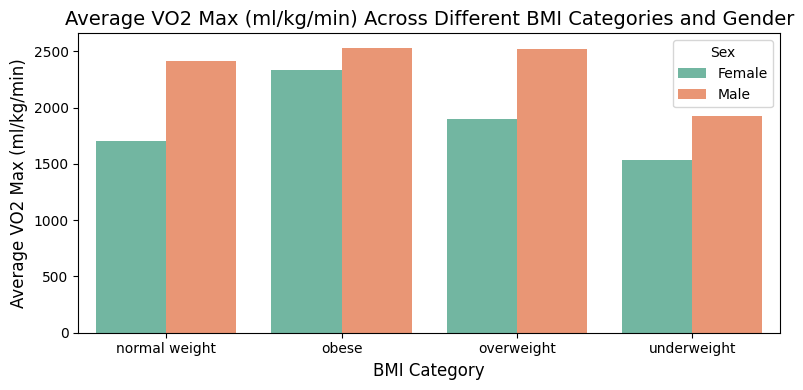

In [11]:
merged_df = pd.merge(test_m, subject_i, on='ID')
merged_df['BMI'] = merged_df['Weight'] / (merged_df['Height'] / 100) ** 2  

# Categorize BMI 
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif 18.5 <= bmi < 24.9:
        return 'normal weight'
    elif 25 <= bmi < 29.9:
        return 'overweight'
    else:
        return 'obese'

merged_df['BMI_Category'] = merged_df['BMI'].apply(categorize_bmi)

avg_vo2_gender = merged_df.groupby(['BMI_Category', 'Sex'])['VO2'].mean().reset_index()

# Display the results
print(avg_vo2_gender)

# Show plot
plt.figure(figsize=(8, 4))
sns.barplot(x='BMI_Category', y='VO2', hue='Sex', data=avg_vo2_gender, palette='Set2')

# Adding titles and labels
plt.title('Average VO2 Max (ml/kg/min) Across Different BMI Categories and Gender', fontsize=14)
plt.xlabel('BMI Category', fontsize=12)
plt.ylabel('Average VO2 Max (ml/kg/min)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


### Question 2: Group participants into age bins and analyze the variation in respiratory rate at peak exercise across these bands.

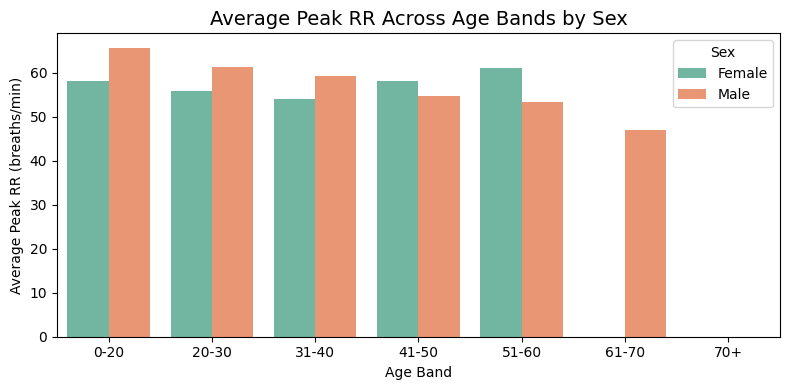

In [13]:

age_bins = [0, 20, 30, 40, 50, 60, 70, 100]
age_labels = ['0-20', '20-30', '31-40', '41-50', '51-60', '61-70', '70+']
merged_df['Age_Band'] = pd.cut(merged_df['Age'], bins=age_bins, labels=age_labels)


peak_rr = merged_df.groupby('ID')['RR'].max().reset_index(name='Peak_RR')

subject_rr = pd.merge(peak_rr, subject_i[['ID', 'Age', 'Sex']], on='ID')
subject_rr['Age_Band'] = pd.cut(subject_rr['Age'], bins=age_bins, labels=age_labels)


avg_rr_by_age_sex = subject_rr.groupby(['Age_Band', 'Sex'], observed=True)['Peak_RR'].mean().reset_index()


plt.figure(figsize=(8, 4))
sns.barplot(
    data=avg_rr_by_age_sex,
    x='Age_Band',
    y='Peak_RR',
    hue='Sex',
    palette='Set2'
)

plt.title('Average Peak RR Across Age Bands by Sex', fontsize=14)
plt.xlabel('Age Band')
plt.ylabel('Average Peak RR (breaths/min)')

plt.tight_layout()
plt.legend(title='Sex')
plt.show()


### Question 3: What is the correlation heatmap of variables like HR, VO2, VCO2, VE, RR?

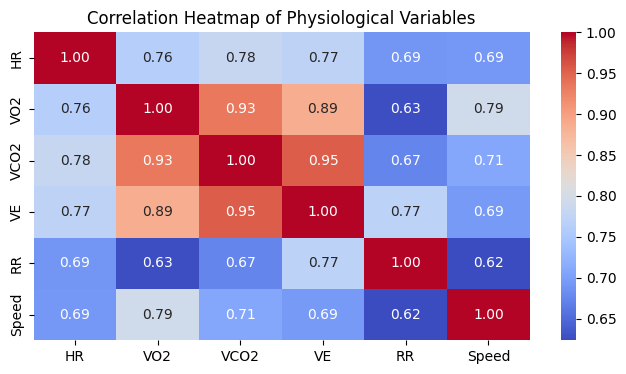

In [15]:
import seaborn as sns

numeric_cols = ['HR', 'VO2', 'VCO2', 'VE', 'RR', 'Speed']
corr = test_m[numeric_cols].corr()

plt.figure(figsize=(8, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Physiological Variables")
plt.show()

### Question 4: At what time does the peak HR occur.How steep is the rise?

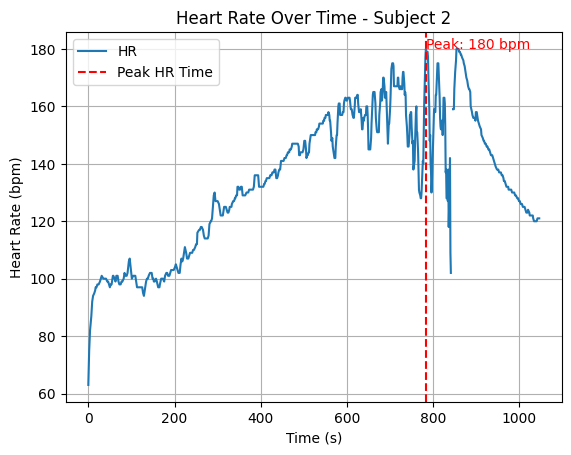

In [17]:
subject_id = test_m['ID'].unique()[0]
subject_i = test_m[test_m['ID'] == subject_id]

peak_hr = subject_i['HR'].max()
peak_time = subject_i[subject_i['HR'] == peak_hr]['time'].values[0]

plt.plot(subject_i['time'], subject_i['HR'], label='HR')
plt.axvline(peak_time, color='red', linestyle='--', label='Peak HR Time')
plt.text(peak_time, peak_hr, f"Peak: {peak_hr:.0f} bpm", color='red')
plt.xlabel('Time (s)')
plt.ylabel('Heart Rate (bpm)')
plt.title(f"Heart Rate Over Time - Subject {subject_id}")
plt.legend()
plt.grid(True)
plt.show()


### Question 5: Create a VE vs VCO2 scatter plot with regression line (Breathing Efficiency)

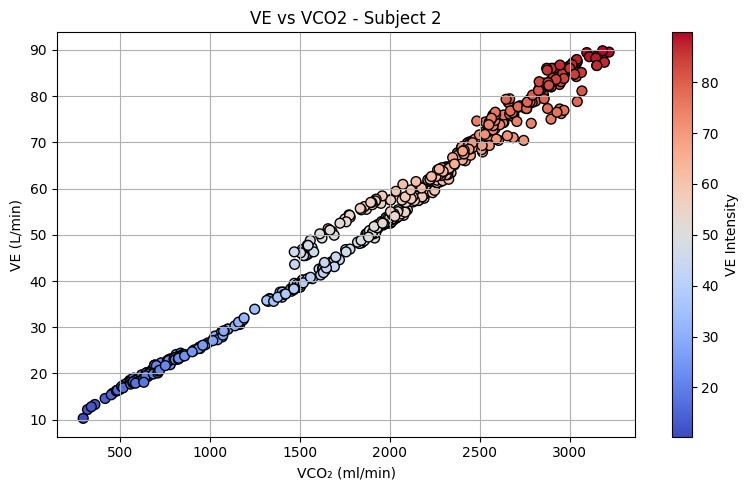

In [19]:
subject_id = test_m['ID'].unique()[0]
subject_i = test_m[test_m['ID'] == subject_id]

plt.figure(figsize=(8, 5))

scatter = plt.scatter(subject_i['VCO2'], subject_i['VE'], 
                      c=subject_i['VE'], cmap='coolwarm', s=50, edgecolor='k')

plt.colorbar(scatter, label='VE Intensity')
plt.title(f"VE vs VCO2 - Subject {subject_id}")
plt.xlabel("VCO₂ (ml/min)")
plt.ylabel("VE (L/min)")
plt.grid(True)
plt.tight_layout()
plt.show()

### Question 6: Stripplot for Oxygen Consumption and Speed 

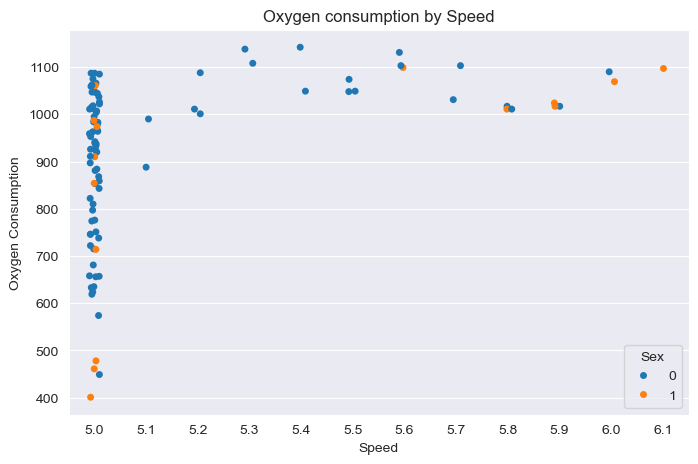

In [74]:
plt.figure(figsize=(8,5))
sns.stripplot(x='Speed',y='VO2',data=test_m[0:100], jitter=True, hue=subject_i['Sex'], dodge=False)
plt.title('Oxygen consumption by Speed')
plt.xlabel('Speed')
plt.ylabel('Oxygen Consumption')
plt.show()

### Question 7:  Find the outliers in HR using boxplot

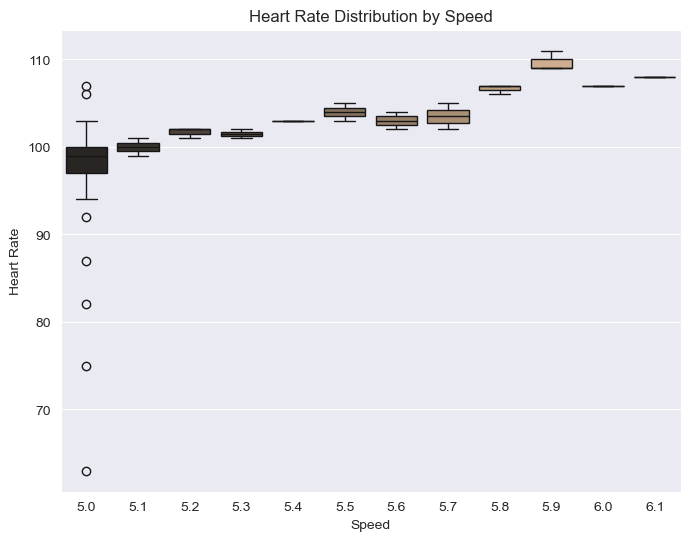

In [44]:

plt.figure(figsize=(8,6))
sns.set_style('darkgrid')
sns.boxplot(x='Speed', y='HR', data=test_m[0:100],palette='dark:#ffcc99', legend=False)
plt.title('Heart Rate Distribution by Speed')
plt.xlabel('Speed')
plt.ylabel('Heart Rate')
plt.show()

### Question 8 : Print a Fibonacci Seris

In [60]:

a, b = 0, 1
n = int(input("Enter the length of fibonacci seris: "))
print(f"Fibonacci Seris of {n}:")
for _ in range(n):
    print(a, end=' ')
    a, b = b, a + b



Enter the length of fibonacci seris:  5


Fibonacci Seris of 5:
0 1 1 2 3 

### Question 9: Violin Plot to show HR distribution with respect to Speed.

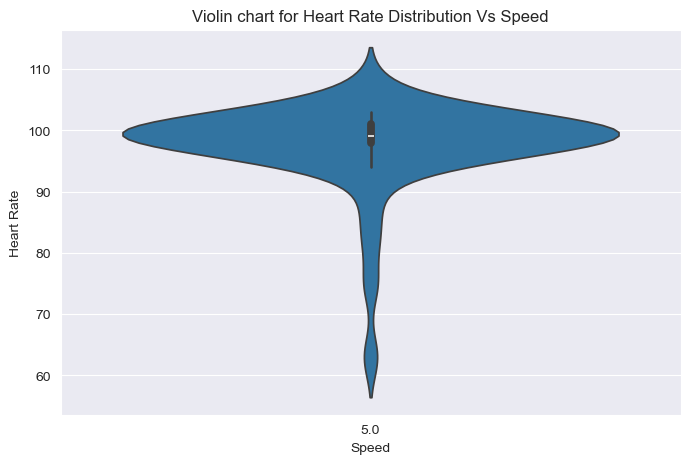

In [69]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='Speed',y='HR',data=test_m[0:50])
plt.title('Violin chart for Heart Rate Distribution Vs Speed')
plt.xlabel('Speed')
plt.ylabel('Heart Rate')
plt.show()

### Question 10 : Swarn Plot showing HR and Speed distribution 

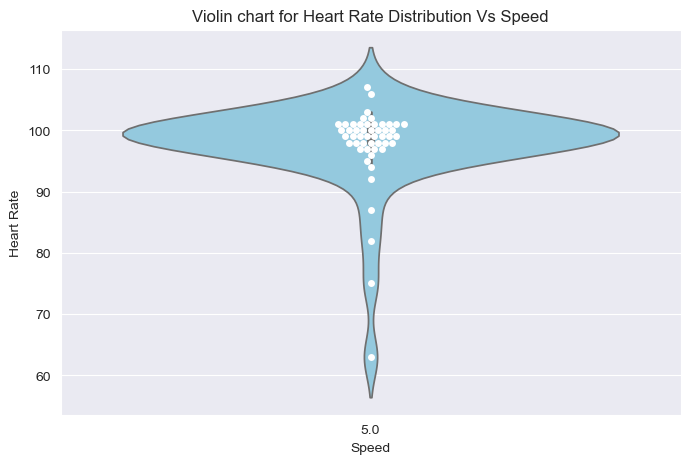

In [82]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='Speed',y='HR',data=test_m[0:50], color='skyblue')

sns.swarmplot(x='Speed',y='HR',data=test_m[0:50], color='white')
plt.title('Violin chart for Heart Rate Distribution Vs Speed')
plt.xlabel('Speed')
plt.ylabel('Heart Rate')
plt.show()

### Question 11.  Plot Violin Plot for Age category with respect to weight

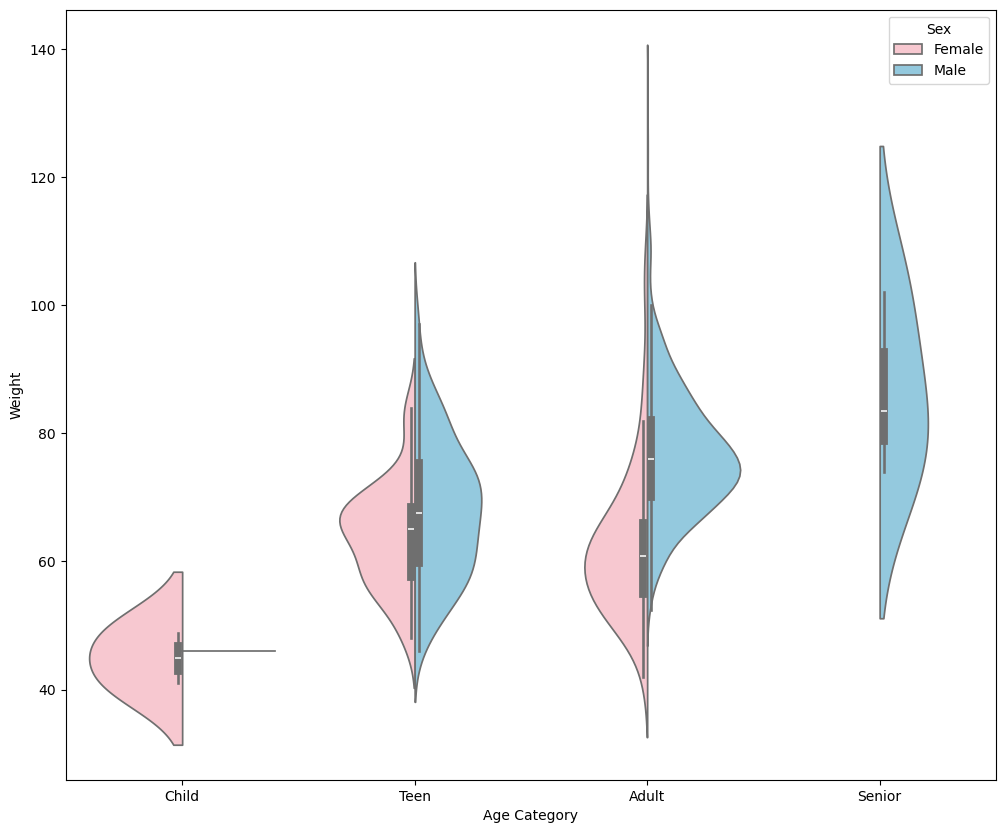

In [7]:
subject_df = pd.read_csv('subject-info.csv')
subject_df['Sex'].replace(0,'Male',inplace=True)
subject_df['Sex'].replace(1,'Female',inplace=True) 


#Age Category
def age_category(df):
    if df['Age'] > 10 and df['Age'] < 13: 
        return 'Child'
    if df['Age'] >= 13 and df['Age'] < 20: 
        return 'Teen'
    if df['Age'] >= 20 and df['Age'] < 60: 
        return 'Adult'
    if df['Age'] >= 60 : 
        return 'Senior'

subject_df['Age Category'] = subject_df.apply(lambda x : age_category(x), axis = 1)

subject_df.head()


# Plot Violin Chart for Age category with respect to weight

fig =plt.figure(figsize =(12,10))

palette_dict = {'Male': 'Skyblue', 'Female': 'Pink'}

sns.violinplot(x='Age Category' ,y='Weight',data=subject_df, hue='Sex', palette=palette_dict ,split=True)

plt.show()
